<a href="https://colab.research.google.com/github/freentour/AIFFEL_quest/blob/main/Main_quest/Quest02/Main_quest_pokemon_by_KJH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 0. 설계
---

- 신경망 모델을 사용해서 비교해 보기
- 이름의 길이라는 특성은 전설의 포켓몬과 일반 포켓몬을 가르는 주요 특성은 아니라고 판단되어서 해당 특성에 대한 feature engineering은 시도하지 않음. (노드 학습에서는 이름의 길이를 전설의 포켓몬 내에서의 비율, 일반 포켓몬 내에서의 비율로 비교했는데, 전체 그룹에서의 비율로 비교해보면 그다지 두 그룹을 가르는 주요 특성으로 보이지 않기 때문)

# STEP 1. 데이터 살펴보기
---

## 구글 드라이브 연결

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 가져오기

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터셋 불러오기

In [132]:
# 파일 경로 : /content/drive/MyDrive/AIFFEL/Pokemon.csv
csv_path = "/content/drive/MyDrive/AIFFEL/Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [133]:
original_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [134]:
# 기본 정보 확인
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [135]:
# 기본 통계 정보 확인
original_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## 원본 데이터 복사하기

In [136]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [137]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [138]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# STEP 2. 데이터 전처리
---

## 중복 데이터 여부 확인하기

In [139]:
pokemon.duplicated().sum()

0

## 이상치 제거

In [140]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [141]:
# 결측치에 대한 평균값 계산
pokemon.isnull().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [142]:
# Type 2 값이 NaN인 행 인덱스만 별도로 저장
type2_na_index = pokemon[pokemon['Type 2'].isnull()].index
type2_na_index

Index([  4,   5,   9,  10,  11,  12,  13,  14,  24,  25,
       ...
       755, 762, 763, 770, 774, 775, 776, 788, 789, 792],
      dtype='int64', length=386)

In [143]:
pokemon.loc[type2_na_index]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [144]:
# Type 2 컬럼의 결측치 값을 'None'으로 대체하기(모델이 'None' 클래스로 학습할 수 있도록!!)
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')

In [145]:
# 결측치가 남아있는지 재확인
pokemon.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [146]:
# 앞에서 저장해 두었던 변수를 이용해 해당 행들이 잘 채워졌는지 확인하기 (loc 사용)
pokemon.loc[type2_na_index]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,None,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,None,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,None,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,None,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,None,514,95,117,184,44,46,28,6,False


## feature 가공

In [147]:
# 범주형 데이터인 Generation 컬럼에 대해서도 feature 가공
generations = list(set(pokemon["Generation"]))
print(len(generations))
print(generations)

6
[1, 2, 3, 4, 5, 6]


In [148]:
# Generation 컬럼 값을 원-핫 인코딩으로 변환
for g in generations:
    pokemon[g] = (pokemon["Generation"] == g)

pokemon[[["Type 1", "Type 2"] + generations][0]].head()

,Type 1,Type 2,1,2,3,4,5,6
0,Grass,Poison,True,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False
4,Fire,None,True,False,False,False,False,False


In [149]:
# 컬럼 이름 변경하기 (기본축이 행이므로 axis=1 추가해야 함)
pokemon = pokemon.rename({1: 'Gen1', 2: 'Gen2', 3: 'Gen3', 4: 'Gen4', 5: 'Gen5', 6: 'Gen6'}, axis=1)

In [150]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,False,False,False,False,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,True,False,False,False,False,False


In [151]:
# 세대별 개수 확인
pokemon[['Gen1', 'Gen2', 'Gen3', 'Gen4', 'Gen5', 'Gen6']].sum()

Gen1    166
Gen2    106
Gen3    160
Gen4    121
Gen5    165
Gen6     82
dtype: int64

In [152]:
# 포켓몬 Type 2 데이터를 중복 없이 types에 저장
# Type 2에 'None' 특성이 추가되었기 때문에 'Type 1' 이 아니라 'Type 2' 기준으로 추출해야 함.
types = list(set(pokemon["Type 2"]))
print(len(types))
print(types)

19
['Poison', 'Ghost', 'Steel', 'Fire', 'Electric', 'Ground', 'None', 'Water', 'Normal', 'Rock', 'Flying', 'Ice', 'Fairy', 'Fighting', 'Dragon', 'Psychic', 'Dark', 'Grass', 'Bug']


In [153]:
# 'Type 1', 'Type 2' 값을 멀티-핫 인코딩으로 변환
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Poison,Ghost,Steel,Fire,Electric,Ground,None,Water,...,Rock,Flying,Ice,Fairy,Fighting,Dragon,Psychic,Dark,Grass,Bug
0,Grass,Poison,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Grass,Poison,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Grass,Poison,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,Grass,Poison,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,Fire,None,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
 13  Gen1        800 non-null    bool  
 14  Gen2        800 non-null    bool  
 15  Gen3        800 non-null    bool  
 16  Gen4        800 non-null    bool  
 17  Gen5        800 non-null    bool  
 18  Gen6        800 non-null    bool  
 19  Poison      800 non-null    bool  
 20  Ghost     

# STEP 3. 모델링과 하이퍼 파라미터 튜닝
---

## 베이스라인 모델 훈련 및 검증

In [155]:
# feature 가공 처리하지 않은 특성 모음
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [156]:
# 원본 데이터로부터 추출
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [157]:
# 원본 데이터로부터 추출
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [158]:
# 훈련 데이터셋과 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=15)

print(train_data.shape, train_targets.shape)
print(test_data.shape, test_targets.shape)

(640, 8) (640,)
(160, 8) (160,)


### 데이터 정규화하기

In [159]:
# 정규화 : 평균을 빼고 표준편차로 나누기 -> 평균이 0, 표준편차가 1인 정규분포로 만들어짐.
# [중요] 각 특성별로 정규화해야 함.
# axis=0 의 의미 : 첫번째 축(즉, 샘플축)의 개수를 사용해 평균과 표준편차를 계산한다는 의미임. 즉, 샘플 개수로 나누겠다는 의미.
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# [중요] 테스트 데이터셋에 대해서 정규화 할 때에도 앞에서 훈련 데이터셋에서 계산한 평균값과 표준편차값을 그대로 재사용해서 정규화해야 함!
test_data -= mean
test_data /= std

In [160]:
train_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
300,-0.051796,-0.357560,0.182272,-0.445624,-0.692950,-0.795553,1.922531,-0.169252
351,0.537902,3.886616,0.337067,-0.931539,0.515546,-0.972921,-0.295118,-0.169252
193,-1.315435,-0.550477,-1.210888,-1.093511,-0.239764,-0.972921,-1.148060,-0.774399
794,1.380328,1.494444,0.646658,1.530429,0.243635,0.800763,0.899001,1.646188
798,2.054269,0.414109,2.504205,-0.445624,2.932538,2.042342,0.387236,1.646188
...,...,...,...,...,...,...,...,...
156,1.211843,0.799943,0.182272,0.850148,0.666608,1.864974,0.557824,-1.379545
384,0.032447,-0.357560,0.337067,-0.121681,-0.390826,1.687606,-0.977471,-0.169252
645,0.832751,0.066858,0.491863,0.364234,1.119794,0.800763,0.353118,1.041041
757,0.386266,0.645609,0.398986,0.461417,-0.149126,0.091289,0.148412,1.646188


In [161]:
test_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
270,2.054269,1.417277,1.575432,0.526205,1.119794,2.893711,0.728412,-0.774399
475,0.369417,-0.164643,-0.096360,0.331839,-0.572100,0.836237,1.240178,0.435895
158,1.211843,0.799943,0.646658,0.526205,1.572980,0.446026,0.728412,-1.379545
247,0.537902,0.221191,0.337067,-0.769568,1.119794,0.268658,0.899001,-0.774399
452,0.664266,-0.357560,-0.282115,-0.283653,1.572980,1.155500,0.728412,0.435895
...,...,...,...,...,...,...,...,...
719,-0.262403,-0.318976,-0.034442,0.688177,-0.511675,-0.511763,-0.397471,1.646188
548,1.380328,1.185777,0.646658,0.850148,0.817670,0.978132,1.069589,0.435895
618,-0.936344,-0.743394,-0.436910,0.364234,-1.146136,-1.327658,-0.465706,1.041041
785,0.487357,-0.550477,0.182272,1.562824,-0.451250,0.091289,1.035471,1.646188


In [162]:
# targets 데이터의 True/False 값을 1/0 으로 변환
train_targets = train_targets.replace({True:1, False:0})
test_targets = test_targets.replace({True:1, False:0})
train_targets

300    0
351    0
193    0
794    1
798    1
      ..
156    1
384    0
645    0
757    0
456    0
Name: Legendary, Length: 640, dtype: int64

In [163]:
# Numpy 배열 형태로 변환
train_data = np.array(train_data)
train_targets = np.array(train_targets)
test_data = np.array(test_data)
test_targets = np.array(test_targets)

In [164]:
train_data

array([[-0.05179605, -0.35755976,  0.18227177, ..., -0.79555301,
         1.92253107, -0.16925197],
       [ 0.53790227,  3.88661609,  0.33706733, ..., -0.97292148,
        -0.2951179 , -0.16925197],
       [-1.31543528, -0.55047684, -1.21088826, ..., -0.97292148,
        -1.14805981, -0.7743987 ],
       ...,
       [ 0.83275142,  0.06685783,  0.49186289, ...,  0.80076321,
         0.35311795,  1.04104147],
       [ 0.38626556,  0.64560908,  0.39898555, ...,  0.09128933,
         0.14841189,  1.64618819],
       [ 0.49578096, -0.35755976, -0.83937892, ...,  2.32613204,
        -1.31864819,  0.43589475]])

In [165]:
train_targets

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [166]:
test_data

array([[ 2.05426935,  1.41727742,  1.5754318 , ...,  2.89371114,
         0.72841239, -0.7743987 ],
       [ 0.36941703, -0.16464267, -0.09636024, ...,  0.8362369 ,
         1.24017754,  0.43589475],
       [ 1.21184319,  0.79994275,  0.64665845, ...,  0.44602627,
         0.72841239, -1.37954542],
       ...,
       [-0.93634351, -0.74339393, -0.43691046, ..., -1.32765842,
        -0.46570628,  1.04104147],
       [ 0.4873567 , -0.55047684,  0.18227177, ...,  0.09128933,
         1.03547148,  1.64618819],
       [ 0.39468982,  0.99285983, -0.28211491, ...,  0.62339474,
        -0.2951179 , -1.37954542]])

In [167]:
test_targets

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### K-겹 교차 검증 진행

In [168]:
# K-겹 교차 검증에 사용할 기본 모델 정의, 컴파일
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [169]:
# K-겹 교차 검증 진행
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_loss_histories = []
all_acc_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    loss_history = history.history["val_loss"]
    acc_history = history.history["val_accuracy"]
    all_loss_histories.append(loss_history)
    all_acc_histories.append(acc_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [170]:
# 정확도 평균값 계산하기
average_acc_history = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]

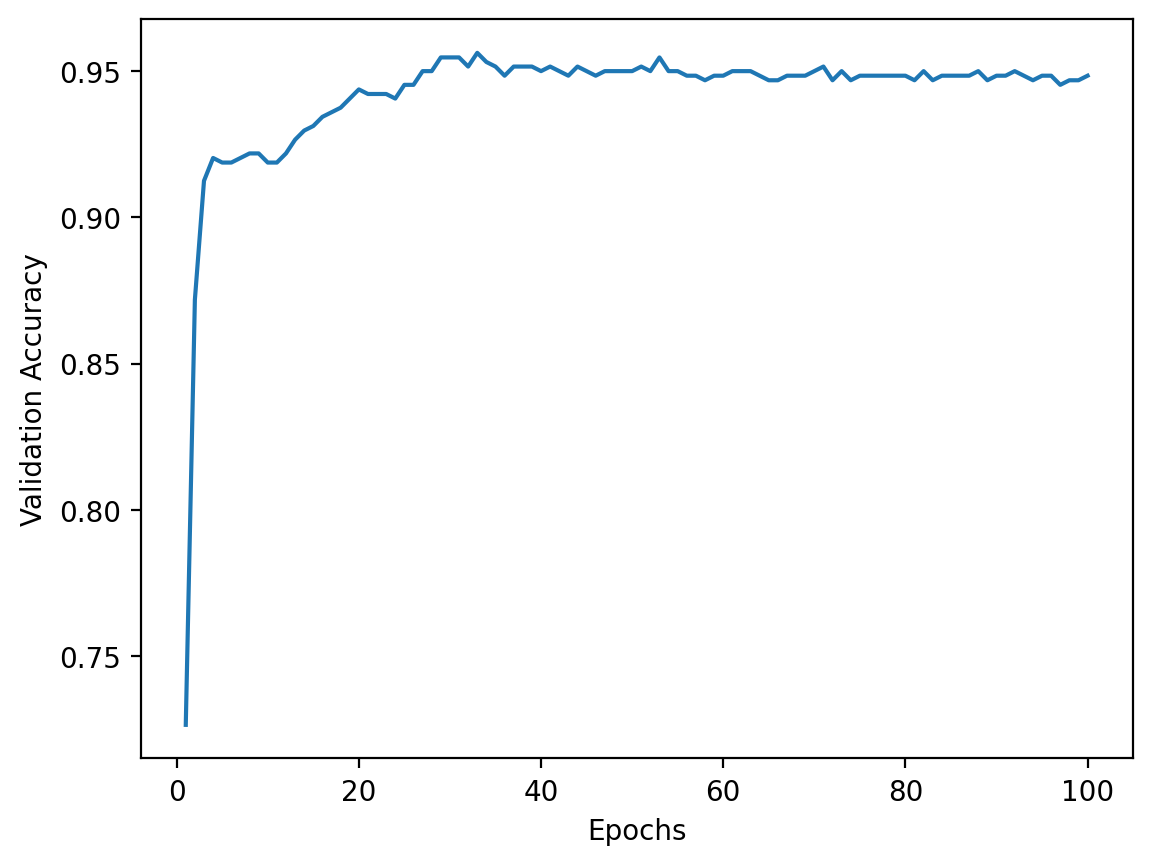

In [171]:
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

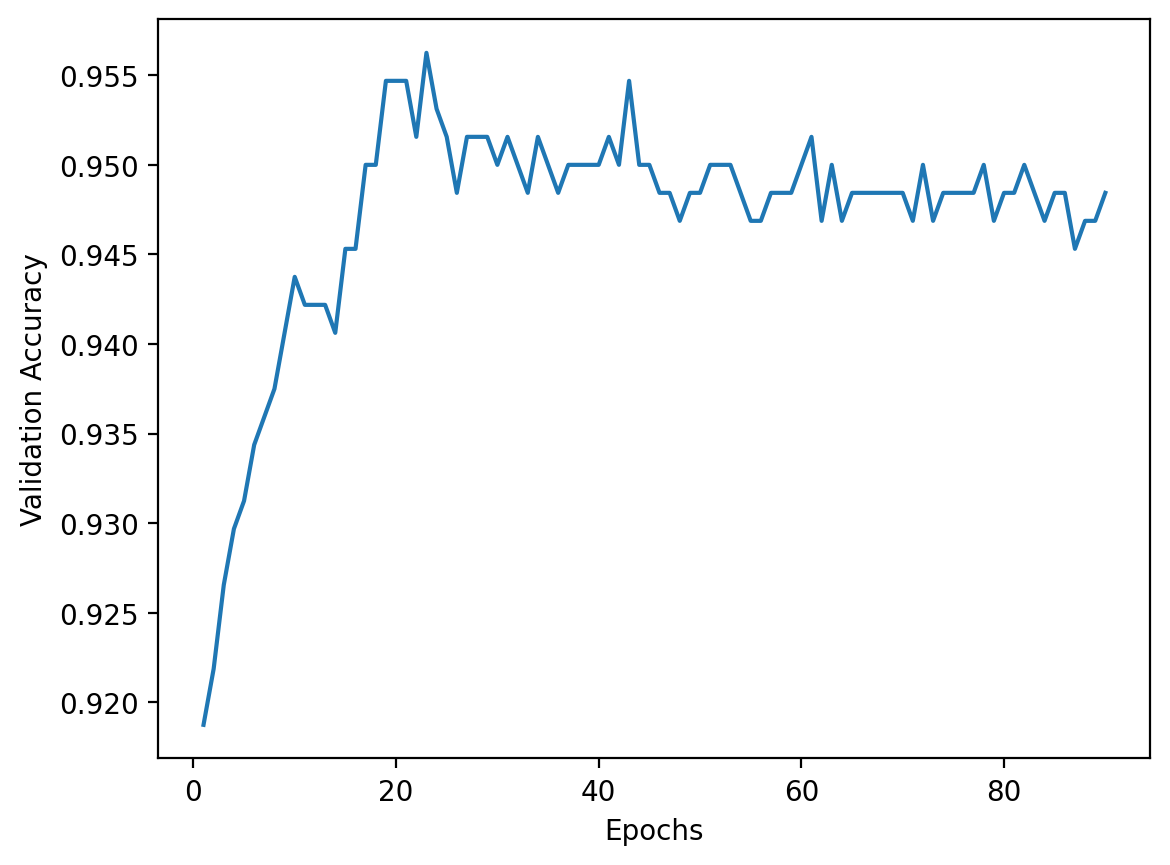

In [172]:
truncated_acc_history = average_acc_history[10:]
plt.plot(range(1, len(truncated_acc_history) + 1), truncated_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

In [173]:
# 손실값 평균값 계산하기
average_loss_history = [
    np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]

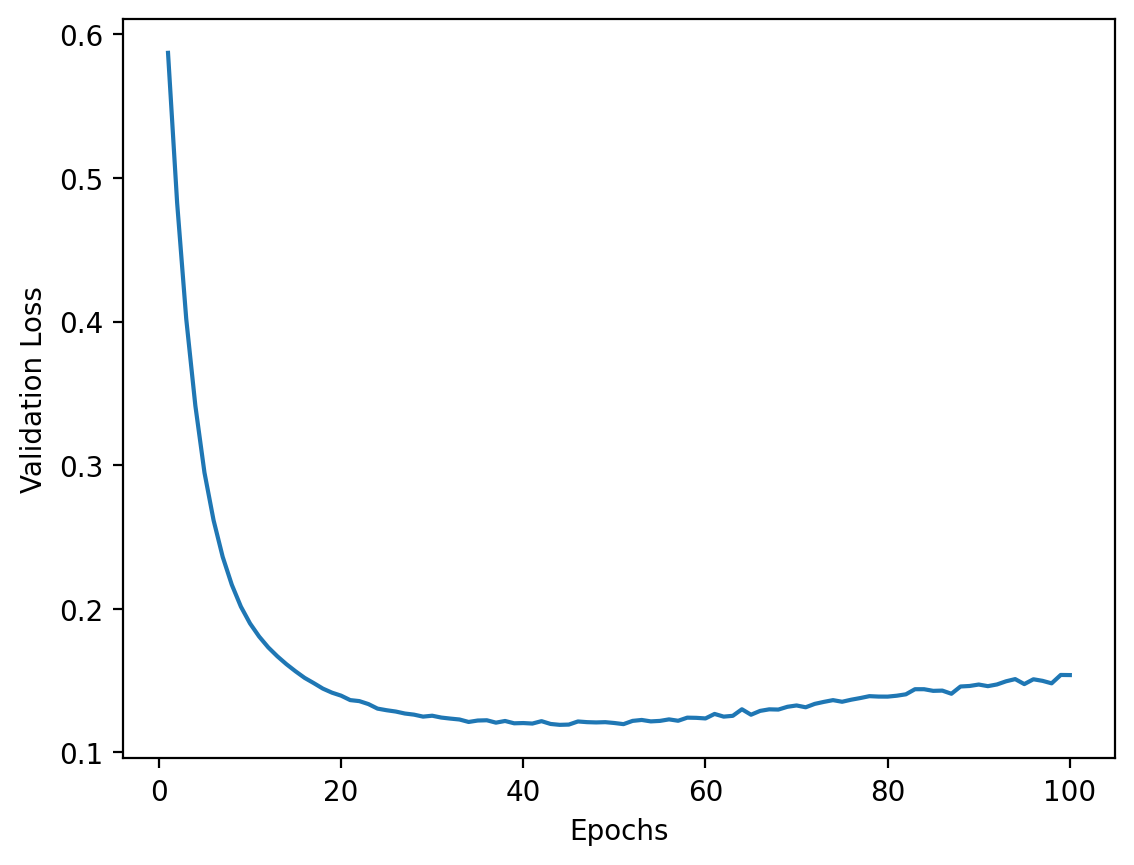

In [174]:
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

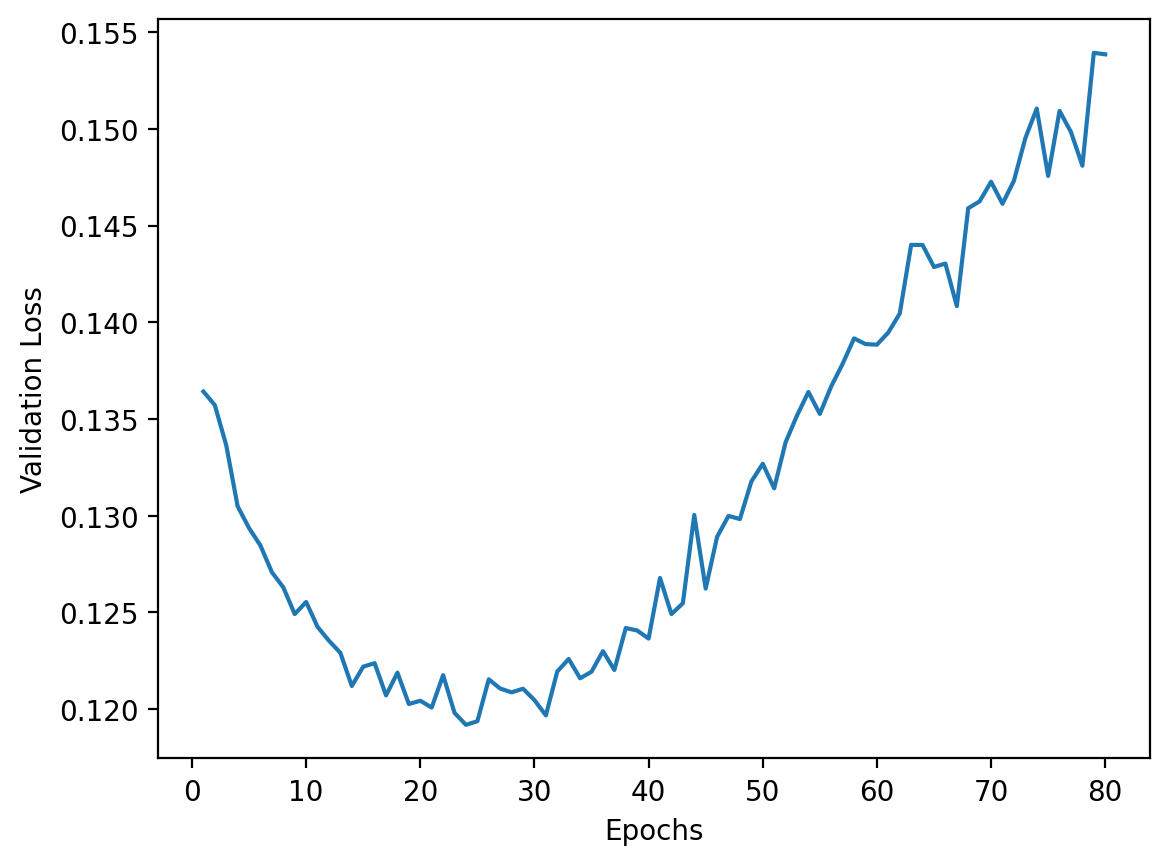

In [175]:
truncated_loss_history = average_loss_history[20:]
plt.plot(range(1, len(truncated_loss_history) + 1), truncated_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

In [176]:
pd.Series(average_loss_history)[:60]

0     0.587193
1     0.482719
2     0.401862
3     0.341494
4     0.294901
5     0.261694
6     0.236227
7     0.216786
8     0.201514
9     0.189831
10    0.180709
11    0.173156
12    0.166933
13    0.161415
14    0.156465
15    0.151877
16    0.148242
17    0.144416
18    0.141602
19    0.139516
20    0.136423
21    0.135721
22    0.133648
23    0.130489
24    0.129362
25    0.128458
26    0.127082
27    0.126299
28    0.124915
29    0.125543
30    0.124258
31    0.123538
32    0.122912
33    0.121198
34    0.122198
35    0.122379
36    0.120715
37    0.121886
38    0.120266
39    0.120436
40    0.120085
41    0.121758
42    0.119809
43    0.119190
44    0.119376
45    0.121545
46    0.121065
47    0.120871
48    0.121057
49    0.120469
50    0.119680
51    0.121947
52    0.122595
53    0.121598
54    0.121936
55    0.122999
56    0.122027
57    0.124196
58    0.124067
59    0.123651
dtype: float64

### 최종 모델 훈련하기

In [177]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=44, batch_size=16, verbose=0)
test_loss_score, test_acc_score = model.evaluate(test_data, test_targets)

5/5 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.9438


In [178]:
test_loss_score, test_acc_score

(0.11959560960531235, 0.9437500238418579)

## 비교 모델 훈련 및 검증

In [179]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
 13  Gen1        800 non-null    bool  
 14  Gen2        800 non-null    bool  
 15  Gen3        800 non-null    bool  
 16  Gen4        800 non-null    bool  
 17  Gen5        800 non-null    bool  
 18  Gen6        800 non-null    bool  
 19  Poison      800 non-null    bool  
 20  Ghost     

In [180]:
types

['Poison',
 'Ghost',
 'Steel',
 'Fire',
 'Electric',
 'Ground',
 'None',
 'Water',
 'Normal',
 'Rock',
 'Flying',
 'Ice',
 'Fairy',
 'Fighting',
 'Dragon',
 'Psychic',
 'Dark',
 'Grass',
 'Bug']

In [181]:
# Generation 특성 제외
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed',
            'Gen1' , 'Gen2', 'Gen3', 'Gen4', 'Gen5', 'Gen6',
            'Poison', 'Ghost', 'Steel', 'Fire', 'Electric', 'Ground', 'None', 'Water', 'Normal', 'Rock',
            'Flying', 'Ice', 'Fairy', 'Fighting', 'Dragon', 'Psychic', 'Dark', 'Grass', 'Bug']

target = "Legendary"

In [182]:
pokemon = pokemon.replace({True:1, False:0})
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Rock,Flying,Ice,Fairy,Fighting,Dragon,Psychic,Dark,Grass,Bug
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,0,0,0,0,0,0,0,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,0,0,0,0,0,0,0,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,0,0,0,0,0,0,0,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,0,0,0,0,0,0,0,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,1,0,0,1,0,0,0,0,0,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,1,0,0,1,0,0,0,0,0,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0,0,0,0,0,0,1,0,0,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0,0,0,0,0,0,1,1,0,0


In [183]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 32)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen1,Gen2,Gen3,...,Rock,Flying,Ice,Fairy,Fighting,Dragon,Psychic,Dark,Grass,Bug
0,318,45,49,49,65,65,45,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,405,60,62,63,80,80,60,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,525,80,82,83,100,100,80,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,625,80,100,123,122,120,80,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    0
1    0
2    0
3    0
4    0
Name: Legendary, dtype: int64

In [185]:
# 훈련 데이터셋과 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=15)

print(train_data.shape, train_targets.shape)
print(test_data.shape, test_targets.shape)

(640, 32) (640,)
(160, 32) (160,)


### 데이터 정규화하기

In [186]:
# 정규화 대상 컬럼만 추출하기
# ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
sub_train_data = train_data[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']]
sub_test_data = test_data[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']]

In [187]:
sub_train_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
300,430,60,85,60,50,50,125
351,500,170,90,45,90,45,60
193,280,55,40,40,65,45,35
794,600,108,100,121,81,95,95
798,680,80,160,60,170,130,80
...,...,...,...,...,...,...,...
156,580,90,85,100,95,125,85
384,440,60,90,70,60,120,40
645,535,71,95,85,110,95,79
757,482,86,92,88,68,75,73


In [188]:
sub_test_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
270,680,106,130,90,110,154,90
475,480,65,76,84,54,96,105
158,580,90,100,90,125,85,90
247,500,75,90,50,110,80,95
452,515,60,70,65,125,105,90
...,...,...,...,...,...,...,...
719,405,61,78,95,56,58,57
548,600,100,100,100,100,100,100
618,325,50,65,85,35,35,55
785,494,55,85,122,58,75,99


In [189]:
# 정규화 : 평균을 빼고 표준편차로 나누기 -> 평균이 0, 표준편차가 1인 정규분포로 만들어짐.
# [중요] 각 특성별로 정규화해야 함.
# axis=0 의 의미 : 첫번째 축(즉, 샘플축)의 개수를 사용해 평균과 표준편차를 계산한다는 의미임. 즉, 샘플 개수로 나누겠다는 의미.
mean = sub_train_data.mean(axis=0)
sub_train_data -= mean
std = sub_train_data.std(axis=0)
sub_train_data /= std

# [중요] 테스트 데이터셋에 대해서 정규화 할 때에도 앞에서 훈련 데이터셋에서 계산한 평균값과 표준편차값을 그대로 재사용해서 정규화해야 함!
sub_test_data -= mean
sub_test_data /= std

In [190]:
sub_train_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
300,-0.051796,-0.357560,0.182272,-0.445624,-0.692950,-0.795553,1.922531
351,0.537902,3.886616,0.337067,-0.931539,0.515546,-0.972921,-0.295118
193,-1.315435,-0.550477,-1.210888,-1.093511,-0.239764,-0.972921,-1.148060
794,1.380328,1.494444,0.646658,1.530429,0.243635,0.800763,0.899001
798,2.054269,0.414109,2.504205,-0.445624,2.932538,2.042342,0.387236
...,...,...,...,...,...,...,...
156,1.211843,0.799943,0.182272,0.850148,0.666608,1.864974,0.557824
384,0.032447,-0.357560,0.337067,-0.121681,-0.390826,1.687606,-0.977471
645,0.832751,0.066858,0.491863,0.364234,1.119794,0.800763,0.353118
757,0.386266,0.645609,0.398986,0.461417,-0.149126,0.091289,0.148412


In [191]:
sub_test_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
270,2.054269,1.417277,1.575432,0.526205,1.119794,2.893711,0.728412
475,0.369417,-0.164643,-0.096360,0.331839,-0.572100,0.836237,1.240178
158,1.211843,0.799943,0.646658,0.526205,1.572980,0.446026,0.728412
247,0.537902,0.221191,0.337067,-0.769568,1.119794,0.268658,0.899001
452,0.664266,-0.357560,-0.282115,-0.283653,1.572980,1.155500,0.728412
...,...,...,...,...,...,...,...
719,-0.262403,-0.318976,-0.034442,0.688177,-0.511675,-0.511763,-0.397471
548,1.380328,1.185777,0.646658,0.850148,0.817670,0.978132,1.069589
618,-0.936344,-0.743394,-0.436910,0.364234,-1.146136,-1.327658,-0.465706
785,0.487357,-0.550477,0.182272,1.562824,-0.451250,0.091289,1.035471


In [192]:
sub2_train_data = train_data.drop(['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed'], axis=1)
sub2_test_data = test_data.drop(['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed'], axis=1)

In [193]:
sub2_train_data

,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6,Poison,Ghost,Steel,Fire,...,Rock,Flying,Ice,Fairy,Fighting,Dragon,Psychic,Dark,Grass,Bug
300,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
794,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
798,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
384,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
757,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [194]:
sub2_test_data

,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6,Poison,Ghost,Steel,Fire,...,Rock,Flying,Ice,Fairy,Fighting,Dragon,Psychic,Dark,Grass,Bug
270,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
475,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
247,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
452,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
548,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
785,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [195]:
# 데이터 프레임 합치기
train_data = pd.concat([sub_train_data, sub2_train_data], axis=1)
test_data = pd.concat([sub_test_data, sub2_test_data], axis=1)

In [196]:
train_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen1,Gen2,Gen3,...,Rock,Flying,Ice,Fairy,Fighting,Dragon,Psychic,Dark,Grass,Bug
300,-0.051796,-0.357560,0.182272,-0.445624,-0.692950,-0.795553,1.922531,0,0,1,...,0,1,0,0,0,0,0,0,0,0
351,0.537902,3.886616,0.337067,-0.931539,0.515546,-0.972921,-0.295118,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193,-1.315435,-0.550477,-1.210888,-1.093511,-0.239764,-0.972921,-1.148060,0,1,0,...,0,0,0,0,0,0,0,0,0,0
794,1.380328,1.494444,0.646658,1.530429,0.243635,0.800763,0.899001,0,0,0,...,0,0,0,0,0,1,0,0,0,0
798,2.054269,0.414109,2.504205,-0.445624,2.932538,2.042342,0.387236,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.211843,0.799943,0.182272,0.850148,0.666608,1.864974,0.557824,1,0,0,...,0,1,1,0,0,0,0,0,0,0
384,0.032447,-0.357560,0.337067,-0.121681,-0.390826,1.687606,-0.977471,0,0,1,...,0,0,0,0,0,0,0,0,0,0
645,0.832751,0.066858,0.491863,0.364234,1.119794,0.800763,0.353118,0,0,0,...,0,0,1,0,0,0,0,0,0,0
757,0.386266,0.645609,0.398986,0.461417,-0.149126,0.091289,0.148412,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [197]:
test_data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen1,Gen2,Gen3,...,Rock,Flying,Ice,Fairy,Fighting,Dragon,Psychic,Dark,Grass,Bug
270,2.054269,1.417277,1.575432,0.526205,1.119794,2.893711,0.728412,0,1,0,...,0,1,0,0,0,0,0,0,0,0
475,0.369417,-0.164643,-0.096360,0.331839,-0.572100,0.836237,1.240178,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,1.211843,0.799943,0.646658,0.526205,1.572980,0.446026,0.728412,1,0,0,...,0,1,0,0,0,0,0,0,0,0
247,0.537902,0.221191,0.337067,-0.769568,1.119794,0.268658,0.899001,0,1,0,...,0,0,0,0,0,0,0,1,0,0
452,0.664266,-0.357560,-0.282115,-0.283653,1.572980,1.155500,0.728412,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,-0.262403,-0.318976,-0.034442,0.688177,-0.511675,-0.511763,-0.397471,0,0,0,...,0,0,0,0,0,0,0,0,1,0
548,1.380328,1.185777,0.646658,0.850148,0.817670,0.978132,1.069589,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618,-0.936344,-0.743394,-0.436910,0.364234,-1.146136,-1.327658,-0.465706,0,0,0,...,1,0,0,0,0,0,0,0,0,1
785,0.487357,-0.550477,0.182272,1.562824,-0.451250,0.091289,1.035471,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [198]:
# Numpy 배열 형태로 변환
train_data = np.array(train_data)
train_targets = np.array(train_targets)
test_data = np.array(test_data)
test_targets = np.array(test_targets)

In [199]:
train_data

array([[-0.05179605, -0.35755976,  0.18227177, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53790227,  3.88661609,  0.33706733, ...,  0.        ,
         0.        ,  0.        ],
       [-1.31543528, -0.55047684, -1.21088826, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.83275142,  0.06685783,  0.49186289, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38626556,  0.64560908,  0.39898555, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.49578096, -0.35755976, -0.83937892, ...,  0.        ,
         0.        ,  0.        ]])

In [200]:
train_targets

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [201]:
test_data

array([[ 2.05426935,  1.41727742,  1.5754318 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36941703, -0.16464267, -0.09636024, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.21184319,  0.79994275,  0.64665845, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.93634351, -0.74339393, -0.43691046, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.4873567 , -0.55047684,  0.18227177, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.39468982,  0.99285983, -0.28211491, ...,  0.        ,
         0.        ,  0.        ]])

In [202]:
test_targets

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### K-겹 교차 검증 진행

In [203]:
# K-겹 교차 검증에 사용할 기본 모델 정의, 컴파일
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [204]:
# K-겹 교차 검증 진행
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_loss_histories = []
all_acc_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    loss_history = history.history["val_loss"]
    acc_history = history.history["val_accuracy"]
    all_loss_histories.append(loss_history)
    all_acc_histories.append(acc_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [205]:
# 정확도 평균값 계산하기
average_acc_history = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]

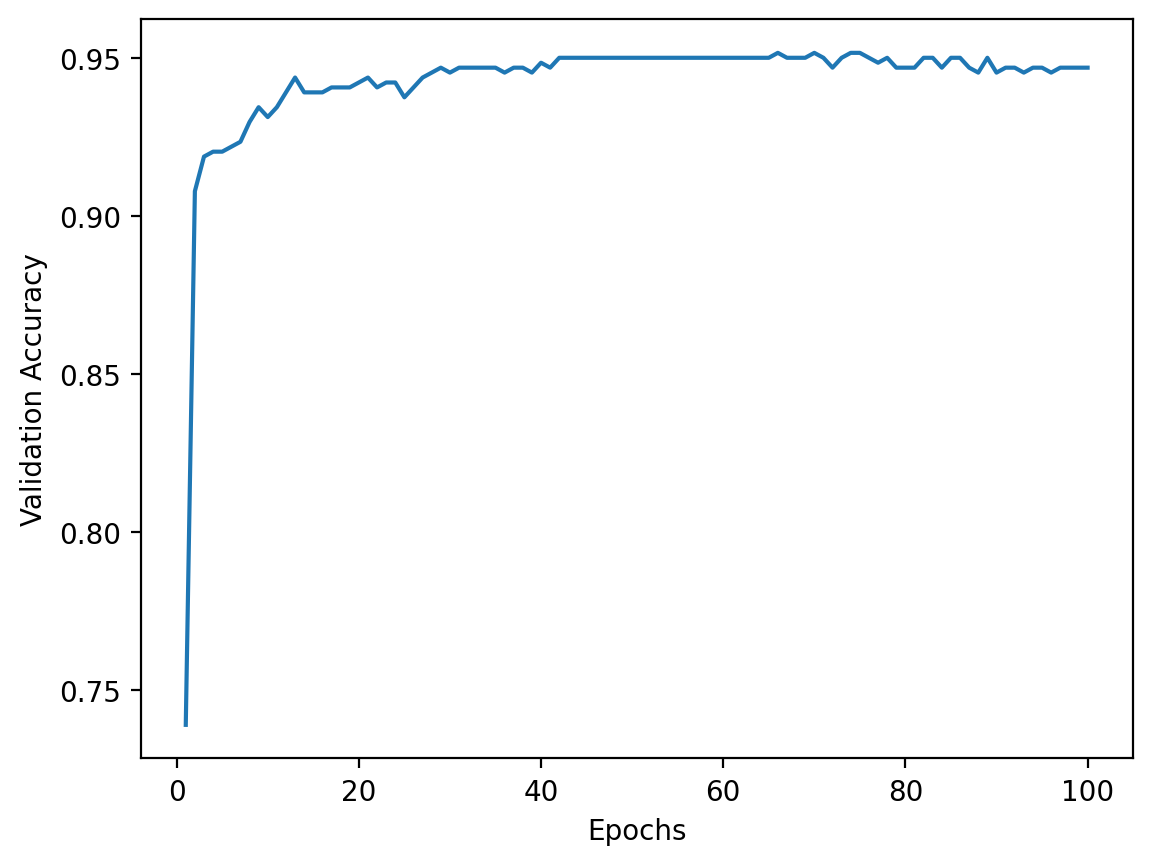

In [206]:
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

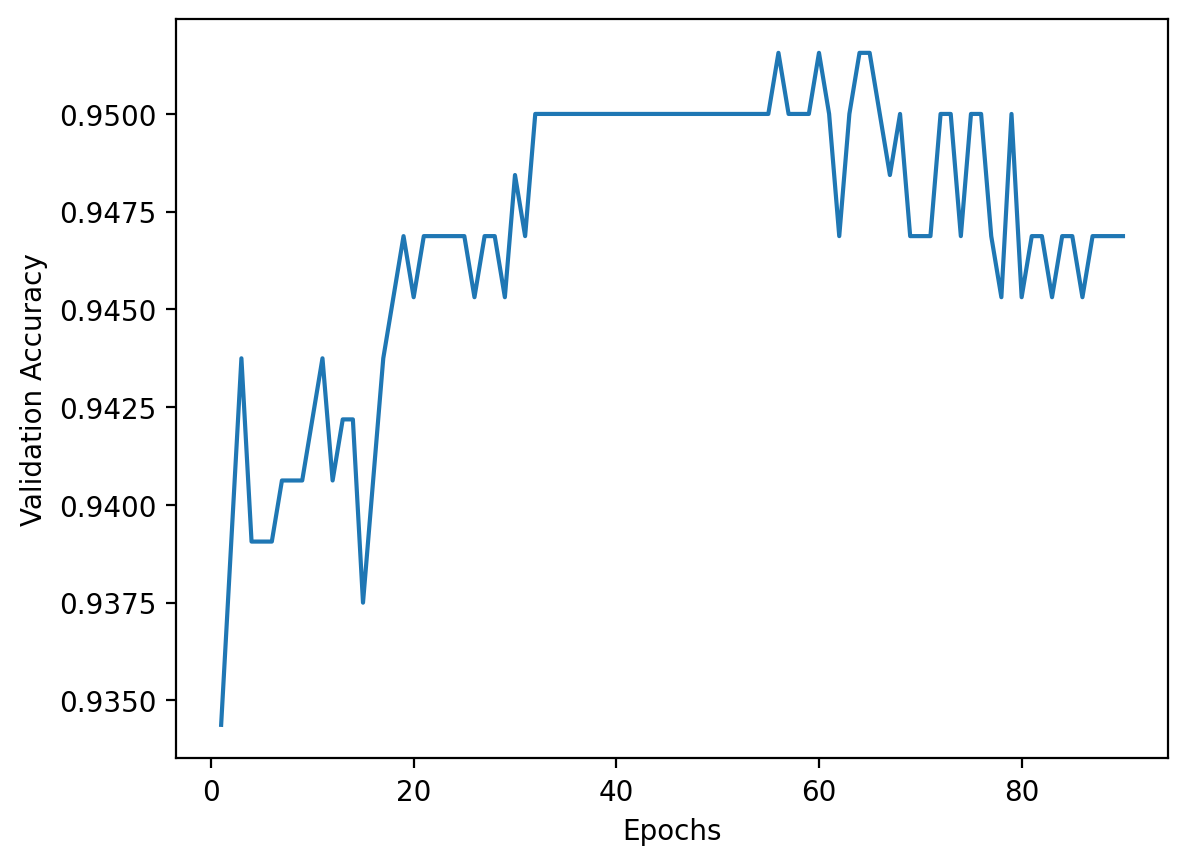

In [207]:
truncated_acc_history = average_acc_history[10:]
plt.plot(range(1, len(truncated_acc_history) + 1), truncated_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

In [208]:
# 손실값 평균값 계산하기
average_loss_history = [
    np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]

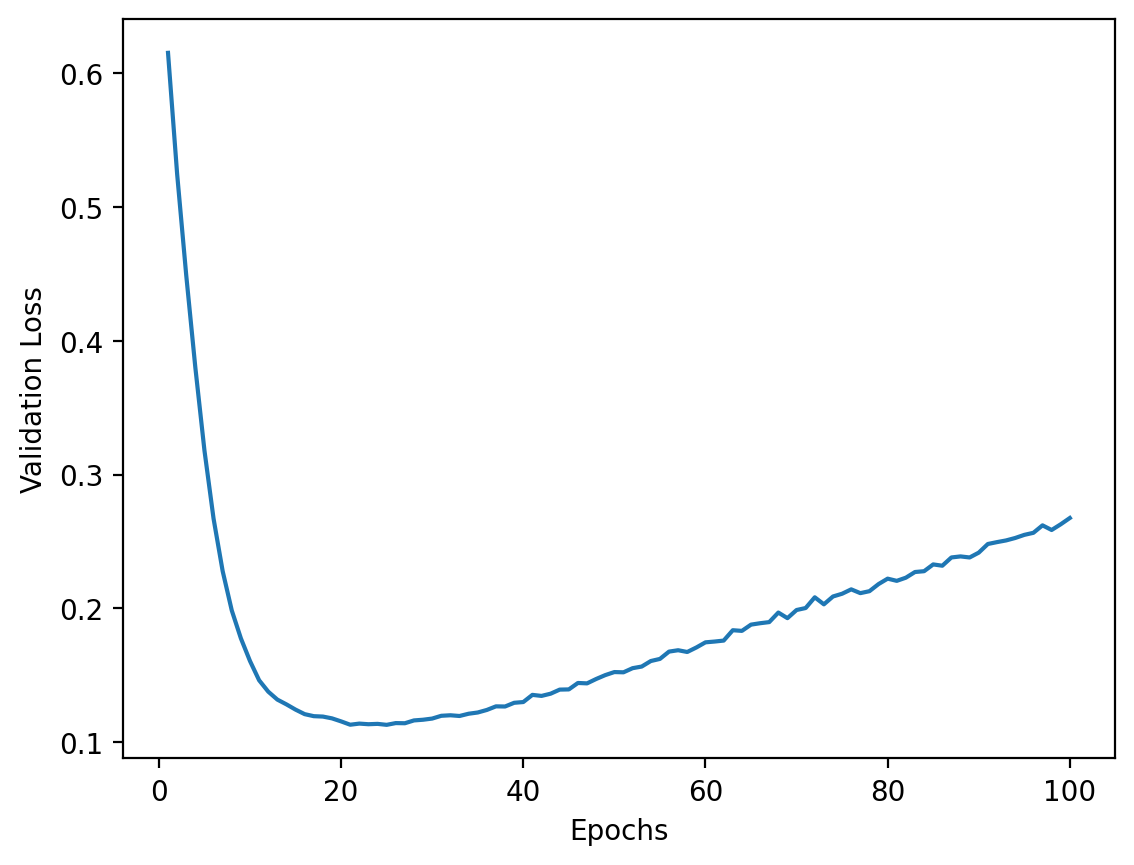

In [209]:
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

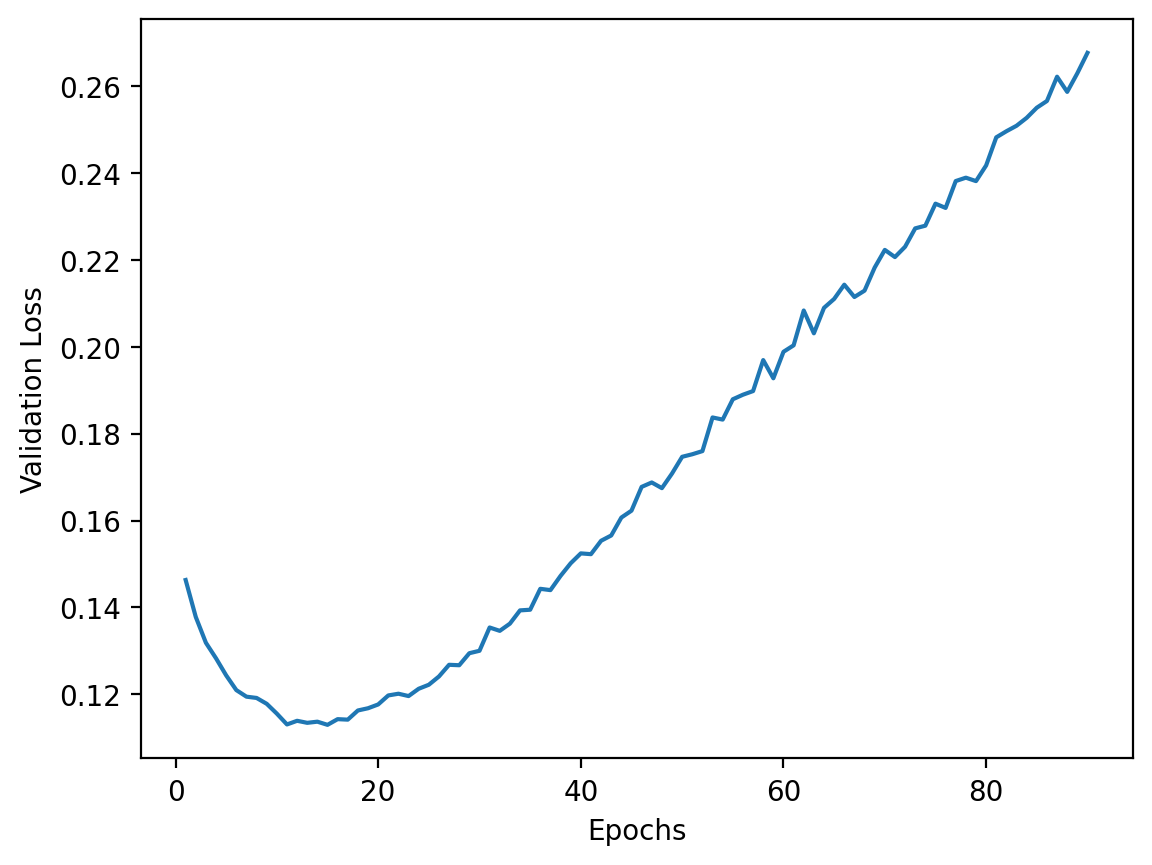

In [210]:
truncated_loss_history = average_loss_history[10:]
plt.plot(range(1, len(truncated_loss_history) + 1), truncated_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

In [211]:
pd.Series(average_loss_history)[:60]

0     0.615381
1     0.524828
2     0.449048
3     0.380052
4     0.318052
5     0.267119
6     0.227879
7     0.198477
8     0.177636
9     0.160694
10    0.146330
11    0.137822
12    0.131879
13    0.128297
14    0.124377
15    0.120995
16    0.119480
17    0.119186
18    0.117839
19    0.115576
20    0.113087
21    0.113927
22    0.113459
23    0.113725
24    0.112996
25    0.114307
26    0.114191
27    0.116303
28    0.116816
29    0.117689
30    0.119763
31    0.120157
32    0.119619
33    0.121301
34    0.122225
35    0.124130
36    0.126814
37    0.126714
38    0.129483
39    0.130040
40    0.135398
41    0.134626
42    0.136283
43    0.139337
44    0.139486
45    0.144301
46    0.143999
47    0.147275
48    0.150179
49    0.152454
50    0.152273
51    0.155357
52    0.156574
53    0.160700
54    0.162283
55    0.167755
56    0.168774
57    0.167467
58    0.170832
59    0.174681
dtype: float64

### 최종 모델 훈련하기

In [228]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=25, batch_size=16, verbose=0)
test_loss_score, test_acc_score = model.evaluate(test_data, test_targets)

5/5 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9563


In [230]:
test_loss_score, test_acc_score

(0.13376620411872864, 0.956250011920929)

# STEP 4. Summary
---

- 베이스라인 모델
  - 최종 손실값 : 0.11959560960531235
  - 최종 정확도 : 94.37%
- 비교 모델
  - 최종 손실값 : 0.13376620411872864
  - 최종 정확도 : 95.62%

- **[결론] 비교 모델이 베이스라인 모델에 비해 손실값은 다소 떨어졌지만, 정확도는 향상됨!**

# 회고
---

- 데이터 전처리 과정에서 범주형 데이터를 원-핫 인코딩 또는 멀티-핫 인코딩 처리하는 좀 더 간단한 방법이 있을거 같음. (다음 번 작업할 때는 시도해 볼 것)
- 데이터 전처리 과정의 스텝이 전체적으로 긴 편인데, 좀 더 압축된 코드로 작성할 수 있을 것으로 예상됨.
- 데이터셋의 크기가 너무 적어 K-겹 교차 검증 방법을 시도하였지만, 좀 더 검증의 정확도를 위해 셔플링 방법까지 시도해 봐야 함.
- 전설의 포켓몬과 일반 포켓몬의 샘플 수가 현격히 차이가 나는 상태기 때문에 평가지표로 정확도 외에 recall 또는 ROC AUC 와 같은 다른 지표로도 시도해 봐야 함.
- 신경망 모델 외에 다른 모델로도 비교해 보고 싶었는데 그러지 못한 부분은 아쉬움.
- 데이터 전처리 작업에서 pandas 문법을 좀 더 자유롭게 사용할 수 있어야 함을 절실히 느낌.